In [ ]:
# !pip install -q tensorflow-gpu==2.0.0-beta1
# Anaconda versão python 3.7.15 e tensorflow 2.0.0

In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
print('Módulos importados')
tf.__version__

ERROR! Session/line number was not unique in database. History logging moved to new session 15
Módulos importados


'2.0.0'

In [3]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [4]:
logdir='log'

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
print('Modelo de rede criado')

Modelo de rede criado


In [9]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
print('tensorboard definido')

tensorboard definido


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images, 
            y=train_labels, 
            epochs=5, 
            validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5


60000/60000 [==============================] - 43s 724us/sample - loss: 0.1519 - accuracy: 0.9519 - val_loss: 0.0540 - val_accuracy: 0.9827
Epoch 2/5
60000/60000 [==============================] - 42s 699us/sample - loss: 0.0487 - accuracy: 0.9848 - val_loss: 0.0425 - val_accuracy: 0.9867
Epoch 3/5
60000/60000 [==============================] - 44s 737us/sample - loss: 0.0347 - accuracy: 0.9887 - val_loss: 0.0335 - val_accuracy: 0.9891
Epoch 4/5
60000/60000 [==============================] - 44s 736us/sample - loss: 0.0265 - accuracy: 0.9914 - val_loss: 0.0359 - val_accuracy: 0.9884
Epoch 5/5
60000/60000 [==============================] - 41s 680us/sample - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0324 - val_accuracy: 0.9902


In [11]:
y_true=test_labels
y_pred=model.predict_classes(test_images)
#y_pred=(model.predict(test_images) > 0.5).astype("int32")

#np.argmax(model.predict(test_labels), axis=-1)

In [12]:
classes=[0,1,2,3,4,5,6,7,8,9]

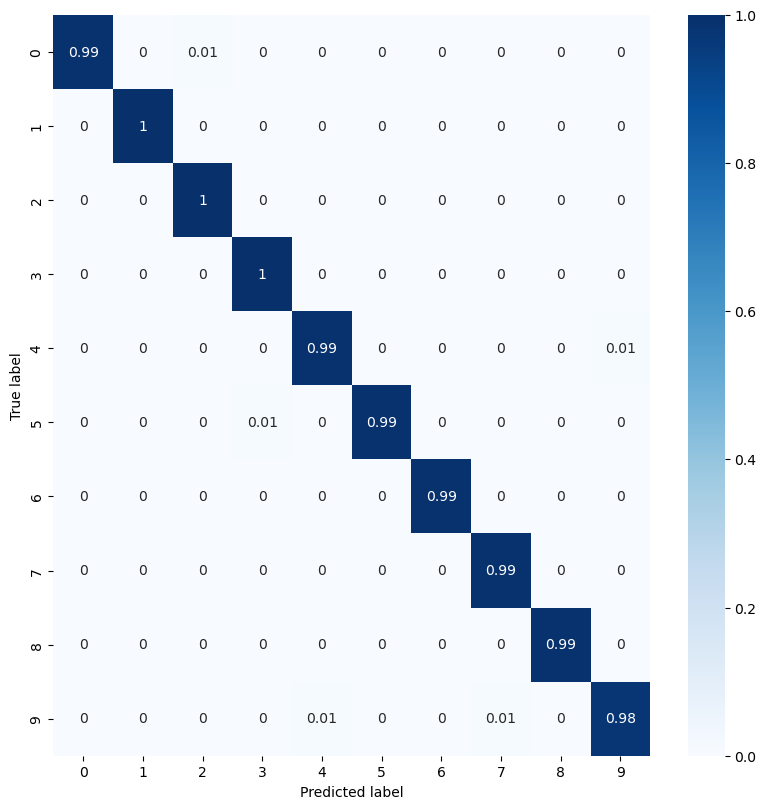

In [13]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
total = len(y_true)
VP = VN = 0
FP = FN = 0
for i in range(total):
    if y_pred[i] == y_true[i]:
        VP += 1
        VN += 1
    else:
        FP += 1
        FN += 1

precisao = sensibilidade = especificidade = acuracia = VP / total
f1 = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)
print(f'precisao = {precisao*100}%')
print(f'sensibilidade = {sensibilidade*100}%')
print(f'especificidade = {especificidade*100}%')
print(f'acuracia = {acuracia*100}%')
print(f'VP = {VP}')
print(f'VN = {VN}')
print(f'FP = {FP}')
print(f'FN = {FN}')
print(f'F-SCORE = {f1}')

precisao = 99.02%
sensibilidade = 99.02%
especificidade = 99.02%
acuracia = 99.02%
VP = 9902
VN = 9902
FP = 98
FN = 98
F-SCORE = 0.9902
